# Calculate Z-Score Index (ZSI) with Python

This index is also as simple as RD and calculated by subtracting the long term mean from an individual rainfall value and then
dividing the difference by the standard deviation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Prepare data

In [2]:
data = pd.read_csv('data/prcphq.046037.month.txt', sep=r"\s+",                    
                   skiprows=1, usecols=[1, 2], 
                   parse_dates=True,
                   index_col = 0,
                   names=['Date', 'Rain'])

## Calculate six-monthly ZSI

Here we use all years as a reference period to calculate monthly long-term normals. ZSI = (p-pm)/s

In [3]:
data['Rain_6'] = data['Rain'].rolling(6).sum()
df_6mon = data[['Rain_6']].dropna()

In [4]:
df_6mon['ZSI'] = np.nan

for imon in np.arange(1, 13):
    sinds = df_6mon.index.month==imon    
    x = df_6mon[sinds]       
    y = (x -x.mean())/x.std()   
    df_6mon.loc[sinds, 'ZSI'] = y.values[:,0]   

In [5]:
data['ZSI'] = df_6mon['ZSI']
del df_6mon
data.head(7)

,Rain,Rain_6,ZSI
Date,,,
1892-01-31,2.5,NaN,NaN
1892-02-29,12.2,NaN,NaN
1892-03-31,1.8,NaN,NaN
1892-04-30,1.5,NaN,NaN
1892-05-31,16.8,NaN,NaN
1892-06-30,1.0,35.8,-0.915872
1892-07-31,11.7,45.0,-0.806282


## Visualize

(-3, 3)

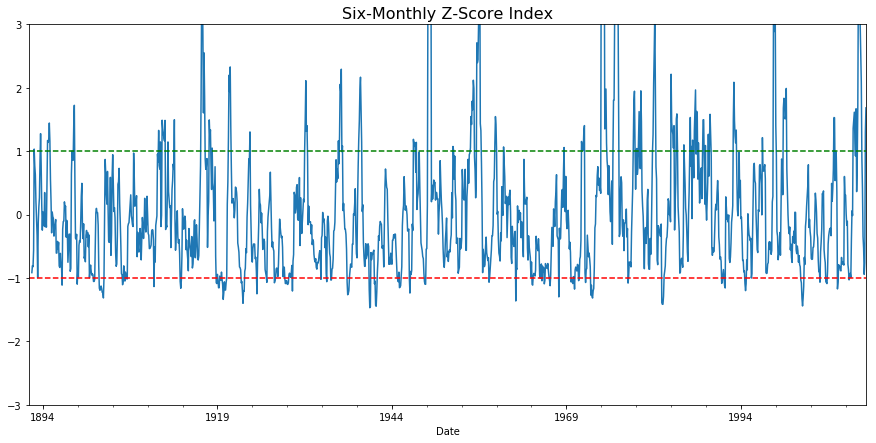

In [6]:
ax = data['ZSI'].plot(figsize=(15, 7), )
ax.axhline(1,  linestyle='--', color='g')
ax.axhline(-1, linestyle='--', color='r')
ax.set_title('Six-Monthly Z-Score Index', fontsize=16)
ax.set_xlim(data.index.min(), data.index.max())
ax.set_ylim(-3, 3)

## Summary and discussion

The Z-Score does not require adjusting the data by fitting the data to the Gamma or Pearson Type III distributions.Because of this, it is speculated that Z-Score might not represent the shorter time scales (Edwards and Mckee, 1997). Because of its simple calculation and effectiveness, Z-Score have been used in many drought studies (Akhtari et al., 2009; Komuscu, 1999; Morid et al., 2006; Patel et al., 2007; Tsakiris and Vangelis, 2004; Wu et al., 2001; Dogan et al., 2012). Various researchers also acclaimed that it is as good as SPI and can be calculated on multiple time steps. It can also accommodate missing values in the data series like CZI.

## References

Akhtari, R., Morid, S., Mahdian, M.H., Smakhtin, V., 2009. Assessment of areal interpolation methods for spatial analysis of SPI and EDI drought indices. Int. J. Climatol. 29, 135–145.

Dogan, S., Berktay, A., Singh, V.P., 2012. Comparison of multi-monthly rainfall-based drought severity indices, with application to semi-arid Konya closed basin, Turkey. J. Hydrol. 470–471, 255–268.

Edwards, D.C., Mckee, T.B., 1997. Characteristics of 20th century drought in the United States at multiple time scales. Atmos. Sci. Pap. 63, 1–30.

Komuscu, A.U., 1999. Using the SPI to analyze spatial and temporal patterns of drought in Turkey. Drought Network News (1994-2001). Paper 49. pp. 7–13.

Morid, S., Smakhtin, V., Moghaddasi, M., 2006. Comparison of seven meteorological indices for drought monitoring in Iran. Int. J. Climatol. 26, 971–985.

Patel, N.R., Chopra, P., Dadhwal, V.K., 2007. Analyzing spatial patterns of meteorological drought using standardized precipitation index. Meteorol. Appl. 14, 329–336.

Tsakiris, G., Vangelis, H., 2004. Towards a drought watch system based on spatial SPI. Water Resour. Manag. 18, 1–12.

Wu, H., Hayes, M.J., Weiss, A., Hu, Q.I., 2001. An evaluation of the standardized precipitation index, the china-Zindex and the statistical Z-Score. Int. J. Climatol.21, 745–758. http://dx.doi.org/10.1002/joc.658.